In [32]:
pip install lale


  Stored in directory: C:\Users\VIRUS\AppData\Local\pip\Cache\wheels\af\89\c9\732423b6882ac44308df31022ec106ac759e2f6709a4c7efd8
Successfully built greenery
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline  
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
clim = pd.read_csv('GlobalLandTemperatures-GlobalLandTemperaturesByCountry.csv')
clim.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [3]:
clim.describe()


,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [4]:
clim['Country'].value_counts()

Poland                                       3239
Switzerland                                  3239
Ireland                                      3239
Estonia                                      3239
Greece                                       3239
France (Europe)                              3239
Iceland                                      3239
Bulgaria                                     3239
Faroe Islands                                3239
Austria                                      3239
Albania                                      3239
Jersey                                       3239
Monaco                                       3239
France                                       3239
Finland                                      3239
Andorra                                      3239
United Kingdom (Europe)                      3239
Hungary                                      3239
Åland                                        3239
Belarus                                      3239


In [5]:
clim[clim["Country"] == "Nigeria"].count()

dt                               1893
AverageTemperature               1721
AverageTemperatureUncertainty    1721
Country                          1893
dtype: int64

In [6]:
x = clim["Country"] == "Nigeria"
clim[x].head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
378950,1856-01-01,24.367,1.082,Nigeria
378951,1856-02-01,25.827,1.621,Nigeria
378952,1856-03-01,28.494,1.015,Nigeria
378953,1856-04-01,29.001,0.985,Nigeria
378954,1856-05-01,28.093,1.198,Nigeria
378955,1856-06-01,NaN,NaN,Nigeria
378956,1856-07-01,NaN,NaN,Nigeria
378957,1856-08-01,NaN,NaN,Nigeria
378958,1856-09-01,NaN,NaN,Nigeria
378959,1856-10-01,NaN,NaN,Nigeria


In [7]:
clim[x].info()
N_clim = clim[x]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 378950 to 380842
Data columns (total 4 columns):
dt                               1893 non-null object
AverageTemperature               1721 non-null float64
AverageTemperatureUncertainty    1721 non-null float64
Country                          1893 non-null object
dtypes: float64(2), object(2)
memory usage: 73.9+ KB


In [8]:
N_clim.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,1721.000000,1721.000000
mean,26.744708,0.583248
std,1.813179,0.384318
min,22.295000,0.101000
25%,25.474000,0.292000
50%,26.448000,0.446000
75%,28.178000,0.809000
max,31.833000,3.050000


In [9]:
N_clim = N_clim.reset_index(drop = True)#restart index count rom zero

In [10]:
clm = N_clim.copy()#make a copy of N_clim and place it in clm

In [11]:
clm["AverageTemperature"].head(6)

0    24.367
1    25.827
2    28.494
3    29.001
4    28.093
5       NaN
Name: AverageTemperature, dtype: float64

In [12]:
c = clm[["AverageTemperature","AverageTemperatureUncertainty"]]

In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(c)
c = pd.DataFrame(data=imputer.transform(c), columns=c.columns)
c.head()

C:\Users\VIRUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,AverageTemperature,AverageTemperatureUncertainty
0,24.367,1.082
1,25.827,1.621
2,28.494,1.015
3,29.001,0.985
4,28.093,1.198


In [14]:
clm["AverageTemperature"].head(7)

0    24.367
1    25.827
2    28.494
3    29.001
4    28.093
5       NaN
6       NaN
Name: AverageTemperature, dtype: float64

In [15]:
c.head(7)

,AverageTemperature,AverageTemperatureUncertainty
0,24.367,1.082
1,25.827,1.621
2,28.494,1.015
3,29.001,0.985
4,28.093,1.198
5,26.448,0.446
6,26.448,0.446


In [16]:
clm = clm.drop(["AverageTemperature", "AverageTemperatureUncertainty"], axis =1)

In [17]:
clm.head()

,dt,Country
0,1856-01-01,Nigeria
1,1856-02-01,Nigeria
2,1856-03-01,Nigeria
3,1856-04-01,Nigeria
4,1856-05-01,Nigeria


In [18]:
clm = pd.concat([clm, c], axis = 1)
clm.head()

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1856-01-01,Nigeria,24.367,1.082
1,1856-02-01,Nigeria,25.827,1.621
2,1856-03-01,Nigeria,28.494,1.015
3,1856-04-01,Nigeria,29.001,0.985
4,1856-05-01,Nigeria,28.093,1.198


In [19]:
w = clm['dt'].str.split("-", n=1, expand = True)
clm['year']= w[0]
clm['month']=w[1]
clm.head()

,dt,Country,AverageTemperature,AverageTemperatureUncertainty,year,month
0,1856-01-01,Nigeria,24.367,1.082,1856,01-01
1,1856-02-01,Nigeria,25.827,1.621,1856,02-01
2,1856-03-01,Nigeria,28.494,1.015,1856,03-01
3,1856-04-01,Nigeria,29.001,0.985,1856,04-01
4,1856-05-01,Nigeria,28.093,1.198,1856,05-01


In [20]:
g = clm['month'].str.split("-", n=1, expand = True)
clm['month']= g[0]
clm['day']=g[1]
clm.head(10)

,dt,Country,AverageTemperature,AverageTemperatureUncertainty,year,month,day
0,1856-01-01,Nigeria,24.367,1.082,1856,01,01
1,1856-02-01,Nigeria,25.827,1.621,1856,02,01
2,1856-03-01,Nigeria,28.494,1.015,1856,03,01
3,1856-04-01,Nigeria,29.001,0.985,1856,04,01
4,1856-05-01,Nigeria,28.093,1.198,1856,05,01
5,1856-06-01,Nigeria,26.448,0.446,1856,06,01
6,1856-07-01,Nigeria,26.448,0.446,1856,07,01
7,1856-08-01,Nigeria,26.448,0.446,1856,08,01
8,1856-09-01,Nigeria,26.448,0.446,1856,09,01
9,1856-10-01,Nigeria,26.448,0.446,1856,10,01


In [21]:
clm = clm.drop(['dt', 'day'], axis = 1)
clm.head()

,Country,AverageTemperature,AverageTemperatureUncertainty,year,month
0,Nigeria,24.367,1.082,1856,01
1,Nigeria,25.827,1.621,1856,02
2,Nigeria,28.494,1.015,1856,03
3,Nigeria,29.001,0.985,1856,04
4,Nigeria,28.093,1.198,1856,05


In [22]:
clm['year'] = pd.to_numeric(clm['year'])
clm['month'] = pd.to_numeric(clm['month'])
clm.head()

,Country,AverageTemperature,AverageTemperatureUncertainty,year,month
0,Nigeria,24.367,1.082,1856,1
1,Nigeria,25.827,1.621,1856,2
2,Nigeria,28.494,1.015,1856,3
3,Nigeria,29.001,0.985,1856,4
4,Nigeria,28.093,1.198,1856,5


In [23]:
type(clm.month[3])

numpy.int64

In [24]:
cl = clm[['AverageTemperature', 'AverageTemperatureUncertainty', 'month', 'year']]

In [25]:
clm.corr()

,AverageTemperature,AverageTemperatureUncertainty,year,month
AverageTemperature,1.000000,-0.177494,0.214476,-0.336836
AverageTemperatureUncertainty,-0.177494,1.000000,-0.583357,-0.033597
year,0.214476,-0.583357,1.000000,-0.003569
month,-0.336836,-0.033597,-0.003569,1.000000


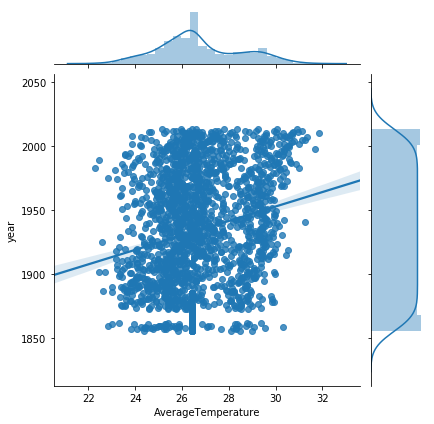

In [26]:
sns.jointplot( x = "AverageTemperature", y = "year", data = clm , kind = 'reg')

In [27]:
y = clm['AverageTemperature']
X = clm.drop(['AverageTemperature', 'Country'], axis = 1)

In [28]:
#null Hypthesis
lr = LinearRegression(normalize= True) # this normalises the data
rmse = np.sqrt(-cross_val_score(lr, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

1.5965113068539232

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
#null Hypthesis
lr = LinearRegression(normalize= True) # this normalises the data
rmse = (cross_val_predict(lr, X, y, method= "predict", cv=10).mean())
rmse


26.70075246726502

Text(0, 0.5, 'AverageTemperature')

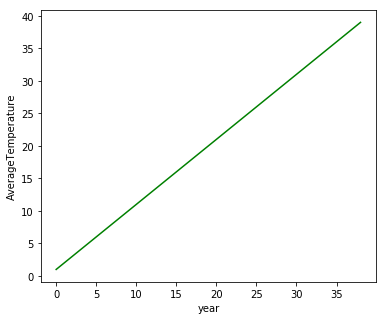

In [31]:
plt.figure(figsize=(6, 5))
plt.plot(range(1,40), "g-")
plt.xlabel("year")
plt.ylabel("AverageTemperature")


In [33]:
from lale.lib.lale import hyperopt

In [36]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']